Generative Adversarial Networks (GANs) are a class of generative models introduced by Ian Goodfellow in 2014. They are widely used in generating realistic but fake data such as images, audio, and text.

- Generator (G):

Takes in random noise (usually from a normal distribution) and tries to generate data that looks real.

Objective: Fool the discriminator into thinking the fake data is real.

- Discriminator (D):

Takes in real and fake data and tries to distinguish between them.

Objective: Accurately classify inputs as real or fake.

It's like a forger (generator) trying to create fake currency, and a detective (discriminator) trying to detect the forgery.

Reach a Nash equilibrium, where the generator produces such realistic data that the discriminator can no longer tell the difference (i.e., 50% accuracy).

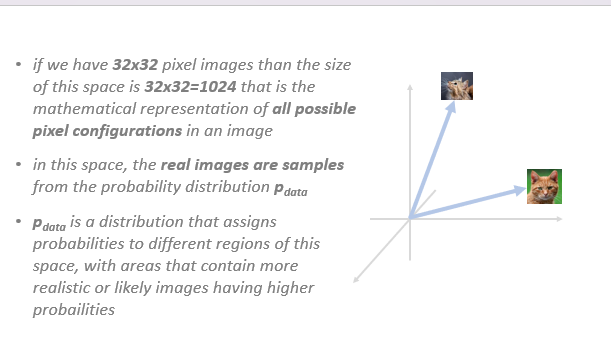

The peaks correspond to a real image and the fake images fall have lower probabilities

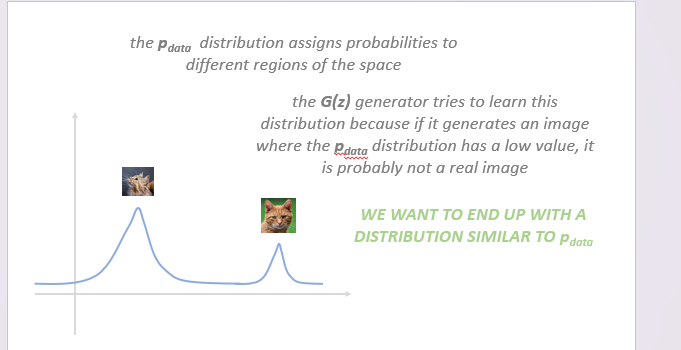

Generator tries to learn the distribution of the real images with the help of a deep neural network.

## Generator Training

- Step 1: Start with Random Noise
The generator takes in a noise vector z from a simple distribution, like:

z ~ N(0, 1)  # Normal distribution

This noise has no structure or meaning — it's just random numbers of some fixed dimension dnoise.



- Step 2: Generator Is a Neural Network
The generator is a neural network G(z) that transforms noise into something structured.

G(z) = generated_image

Initially, the output is garbage — just random pixels.



- Step 3: Discriminator Gives Feedback
The discriminator D(x) is trained to:

Output 1 for real data and 
Output 0 for fake data (from the generator)

The generator tries to fool the discriminator.

So during training:
Discriminator gets better at spotting fakes and Generator gets better at producing realistic fakes




- Step 4: Generator learns via Gradient Descent

The generator uses gradient descent to minimize a loss function that measures how well it fooled the discriminator.

Generator's Goal: Make D(G(z)) → 1

Generator Loss Function:

LG = −log(D(G(z)))
This loss is backpropagated through the generator to adjust its weights, so it improves over time.



- Step 5: Generator Learns Data Distribution

As training continues, Generator keeps improving the mapping: z → G(z), where z is random noise and G(z) becomes more and more realistic.

The generator is effectively learning the distribution of real data (like face images, or digits).




🧠 Intuition: Matching Distributions
Let's say your real data P_data is a bunch of 2D points in a spiral shape.

At the beginning:

G(z) might output random points all over the place.

D(x) easily detects fakes.

As training goes on: G(z) learns to reshape the noise distribution into the spiral shape, i.e. make P_g ≈ P_data.

GENERATOR LEARNS THE DISTRIBUTION NOT THE INDIVIDUAL SAMPLES !!!






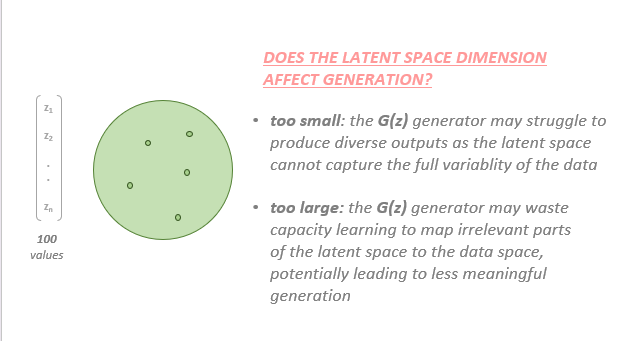


### Discriminator loss function
LD= - log(D(z))- log(1-D(z))

| Term                 | Meaning                                                                  |
| -------------------- | ------------------------------------------------------------------------ |
| $\log D(x)$          | High when real data is classified correctly as real                      |
| $\log (1 - D(G(z)))$ | High when fake data is classified correctly as fake                      |
| $-$ sign             | Because we use gradient **descent**, we minimize negative log-likelihood |



## GAN Implementation 1



In [1]:
from keras.datasets import mnist
import numpy as np
import os

X_train, y_train = mnist.load_data()[0]
X_test, y_test = mnist.load_data()[1]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [2]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [5]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [6]:
# Minmax normalization
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [7]:
### Dimensions of the latent/noise spacem usually between 100 and 200
from keras.optimizers import Adam
latent_dim = 100
losses = {"Disciminator": [], "Generator": []}

adam = Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.9)


In [8]:
## Generator transforms the lower dimensional latent space z random vector to the higher dimensional image space
from keras.layers import Dense, Reshape, Flatten, LeakyReLU, Dropout
from keras.models import Sequential
generator= Sequential()
generator.add(Dense(256, input_dim=latent_dim, activation=LeakyReLU(alpha=0.2)))
# we use leaky relu activation function to avoid input<0 to vanish, so that the neural network doesnt dtop learning
generator.add(Dense(1024, activation=LeakyReLU(alpha=0.2)))
generator.add(Dense(784, activation='sigmoid')) #sigmoid activation function to get the output between 0 and 

c:\Users\soundarya.sarathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\soundarya.sarathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
generator.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [11]:
discriminator = Sequential()
discriminator.add(Dense(1024, input_dim=784, activation=LeakyReLU(alpha=0.2)))
discriminator.add(Dropout(0.3))  # dropout layer to avoid overfitting
discriminator.add(Dense(512, activation=LeakyReLU(alpha=0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation='sigmoid'))  # output layer with sigmoid activation function

c:\Users\soundarya.sarathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Users\soundarya.sarathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
